In [1]:
import multiverse_python as mp

# Load snapshot data

In [2]:
cosmology = "lcdm"
snapNum = 150
lmin = 7

In [3]:
basePath = f"/data2/gilee/Multiverse/lmin{lmin:02d}/{cosmology.upper()}"

In [4]:
data = mp.snapshot.loadDataAll(cosmology, basePath, snapNum)


[Load Data]

[Load Info]
  Found info: /data2/gilee/Multiverse/lmin07/LCDM/output_00150/info_00150.txt
  keys in info: dict_keys(['ncpu', 'ndim', 'levelmin', 'levelmax', 'ngridmax', 'nstep_coarse', 'boxlen', 'time', 'aexp', 'H0', 'omega_m', 'omega_l', 'omega_k', 'omega_b', 'unit_l', 'unit_d', 'unit_t', 'ordering type'])
  Found data: /data2/gilee/Multiverse/lmin07/LCDM/output_00150/part_00150.out00001
  Found data: /data2/gilee/Multiverse/lmin07/LCDM/output_00150/part_00150.out00002
  Found data: /data2/gilee/Multiverse/lmin07/LCDM/output_00150/part_00150.out00003
  Found data: /data2/gilee/Multiverse/lmin07/LCDM/output_00150/part_00150.out00004
  Found data: /data2/gilee/Multiverse/lmin07/LCDM/output_00150/part_00150.out00005
  Found data: /data2/gilee/Multiverse/lmin07/LCDM/output_00150/part_00150.out00006
  Found data: /data2/gilee/Multiverse/lmin07/LCDM/output_00150/part_00150.out00007
  Found data: /data2/gilee/Multiverse/lmin07/LCDM/output_00150/part_00150.out00008
  Found data:

In [5]:
data

{'header': {'ncpu': 32,
  'ndim': 3,
  'levelmin': 7,
  'levelmax': 14,
  'ngridmax': 625000,
  'nstep_coarse': 5216,
  'boxlen': 1.0,
  'time': 0.000147687361079948,
  'aexp': 1.00014666915642,
  'H0': 72.0,
  'omega_m': 0.259999990463257,
  'omega_l': 0.740000009536743,
  'omega_k': 0.0,
  'omega_b': 0.0469999983906746,
  'unit_l': 5.04701237217753e+25,
  'unit_d': 2.53282448190015e-30,
  'unit_t': 4.285728333333333e+17,
  'ordering type': 'hilbert',
  'unit_m': 3.2561784928050035e+47,
  'cosmology': 'lcdm',
  'snapNum': 150},
 'npart': array([ 96062,  77075,  64858,  87576,  98381, 113715,  75350,  92627,
         88265, 100884, 119179,  87247,  63807,  89186,  93527, 119439,
         97704,  63560,  81224,  91363, 103474,  85976,  75543,  82728,
        115235, 106916, 102836,  69133,  76391,  86387,  82411,  80706]),
 'ids': array([     25,      43,      45, ...,    -194,  332144, 1974059]),
 'positions': array([[0.12874078, 0.09522106, 0.24441732],
        [0.19974432, 0.06809207

<IPython.core.display.Javascript object>


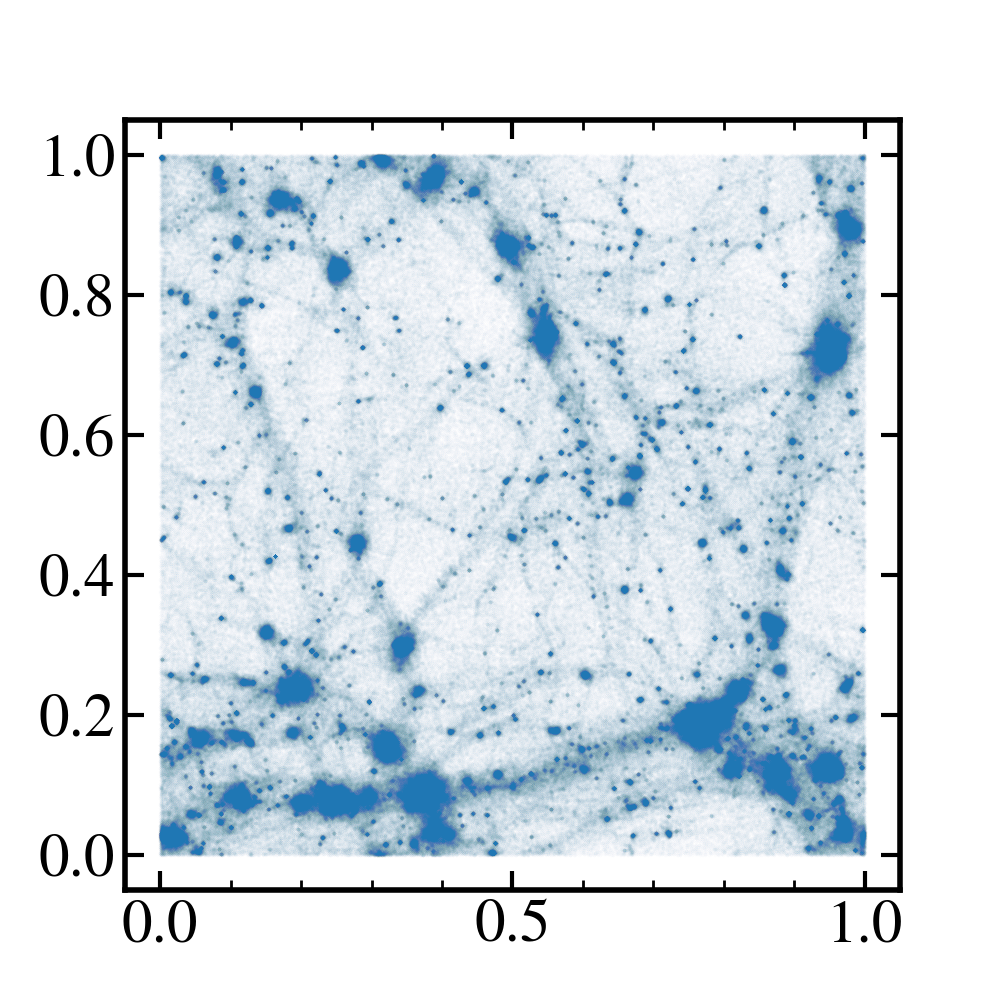

In [6]:
plt.figure(figsize=(5, 5))
plt.scatter(data['positions'][:,0], data['positions'][:,1], s=0.1, alpha=0.01)

# CSFR

In [7]:
z, csfr = mp.processing.computeCSFR(data)


[Load Time Table]
  cosmology: lcdm
  (w0, wa) = (-1.0, 0.0)
  Found time table: /md/gilee/cosmos-in-us/Multiverse-utils/notebooks/friedmann/time_table_cpl-1.0+0.0.csv

Returns z, csfr


In [8]:
import pandas as pd
def get_csfr_behroozi(file_path):
    """
    Plots the cosmic star formation rate density from Behroozi et al. (2013).
    """
    # Read the data
    behroozi = pd.read_csv(file_path, 
                           names=['z', 'log10_csfr', 'err+', 'err-'], 
                           skiprows=3, delim_whitespace=True)
    
    return behroozi

In [9]:
behroozi = get_csfr_behroozi("/md/gilee/cosmos-in-us/Multiverse-utils/notebooks/read_particle/behroozi/behroozi-2013-data-compilation/csfrs_new.dat")
a_refine = [0.8, 0.4, 0.2, 0.1, 0.05, 0.025, 0.0125]
a_refine = np.array(a_refine)
z_refine = 1/a_refine - 1

<IPython.core.display.Javascript object>


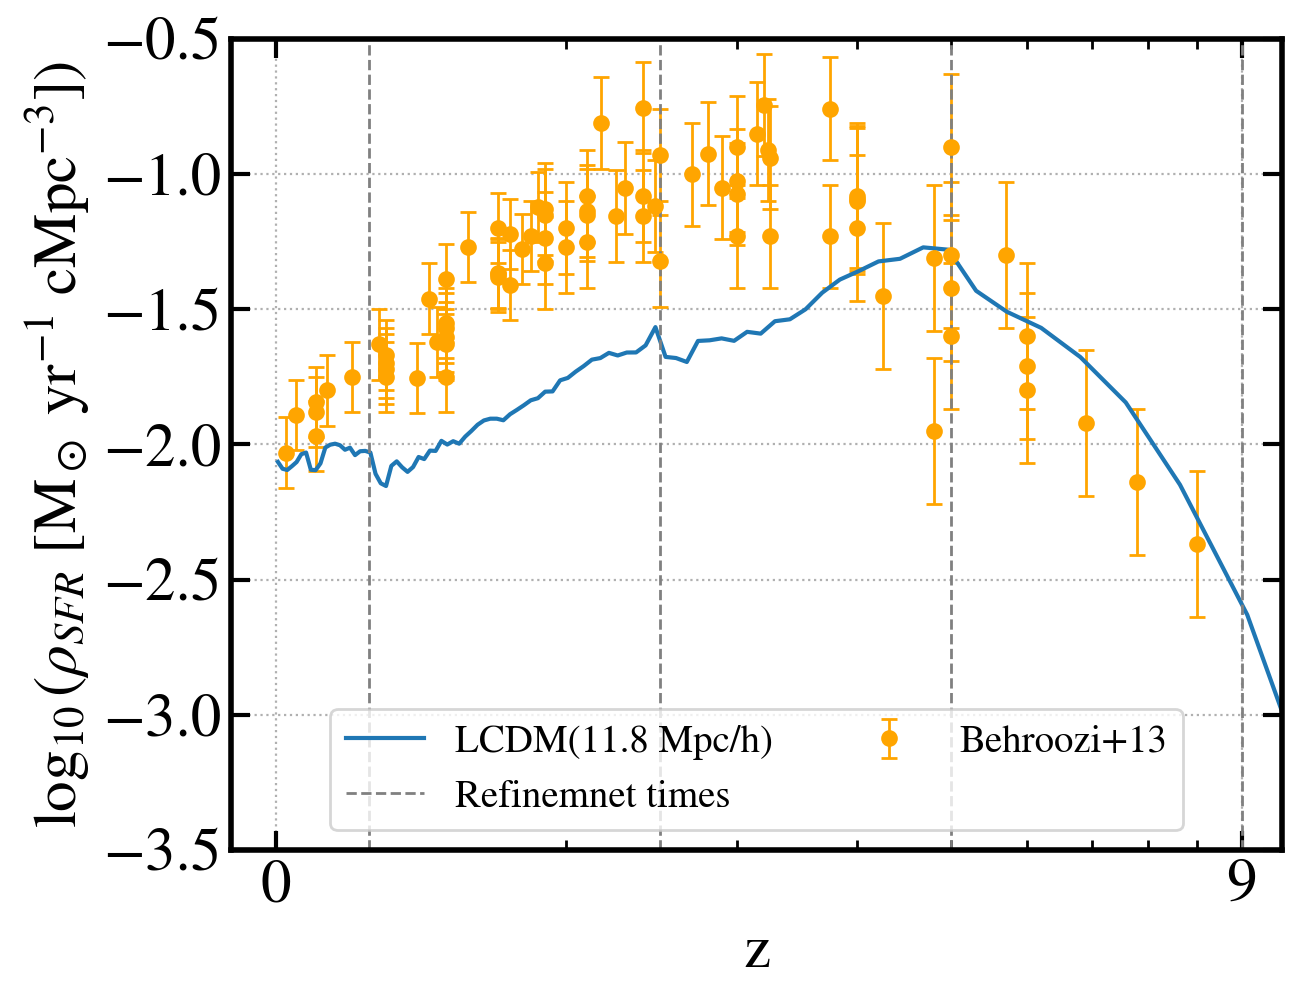

/tmp/ipykernel_2275364/2399302401.py:16: RuntimeWarning: divide by zero encountered in log10
  plt.plot(z + 1, np.log10(csfr), label="LCDM(11.8 Mpc/h)")


In [10]:
plt.figure(figsize=(6.5, 5))

# Observational results
plt.errorbar(
    behroozi['z']+1,
    behroozi['log10_csfr'],
    yerr=[behroozi['err-'], behroozi['err+']],
    fmt='o', c='orange',
    capsize=3,
    elinewidth=1,
    ms=5,
    label="Behroozi+13"
)

# # Simulation results
plt.plot(z + 1, np.log10(csfr), label="LCDM(11.8 Mpc/h)")
# plt.plot(csfr_lcdm_l08[0] + 1, np.log10(csfr_lcdm_l08[1]), label="LCDM(23.6 Mpc/h)")
# plt.plot(csfr_lcdm_l09[0] + 1, np.log10(csfr_lcdm_l09[1]), label="LCDM(47.2 Mpc/h)")

# Refinement times
plt.axvline([0], ls="--", c='gray', lw=1, label="Refinemnet times")
for z_ref in z_refine:
    plt.axvline(z_ref+1, ls="--", c='gray', lw=1)

plt.xscale('log')
plt.xlim(0.9, 11)
plt.ylim(-3.5, -0.5)

# Set custom ticks and labels
ticks = [1, 10]  # Positions for 10^0 and 10^1
labels = ['0', '9']  # Custom labels
plt.xticks(ticks, labels)

plt.legend(fontsize=14, ncols=2, frameon=True, loc="lower center")

plt.grid(ls=":")
plt.xlabel("z")
plt.ylabel(r"$\log_{10}(\rho_{SFR}$ [M$_\odot$ yr$^{-1}$ cMpc$^{-3}$])")
plt.tight_layout(pad=0.3)

# Overdensity

In [11]:
mp.processing.saveOverdensity(data)


[Compute overdensity map]
  Boxsize: 16.36 Mpc
  levelmin: 7
  Grid size: 128
header:  {'n1': 128, 'n2': 128, 'n3': 128, 'dxini0': 0.12778128907959815, 'xoff10': 0.0, 'xoff20': 0.0, 'xoff30': 0.0, 'astart0': 0.004975124378109453, 'omega_m0': 0.259999990463257, 'omega_l0': 0.740000009536743, 'h00': 0.72}
overdensity:  (128, 128, 128)
block size for header:  44
Writing header ... successfully done!
Writing slice 1/128, block size: 65536
Writing slice 2/128, block size: 65536
Writing slice 3/128, block size: 65536
Writing slice 4/128, block size: 65536
Writing slice 5/128, block size: 65536
Writing slice 6/128, block size: 65536
Writing slice 7/128, block size: 65536
Writing slice 8/128, block size: 65536
Writing slice 9/128, block size: 65536
Writing slice 10/128, block size: 65536
Writing slice 11/128, block size: 65536
Writing slice 12/128, block size: 65536
Writing slice 13/128, block size: 65536
Writing slice 14/128, block size: 65536
Writing slice 15/128, block size: 65536
Writing 